In [8]:
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [41]:
# 파일 불러오기
train = pd.read_csv('/content/drive/My Drive/Semi-project_01/open/train.csv', encoding = 'utf-8')
test = pd.read_csv('/content/drive/My Drive/Semi-project_01/open/test_x.csv', encoding = 'utf-8')
sample_submission = pd.read_csv('/content/drive/My Drive/Semi-project_01/open/sample_submission.csv', encoding = 'utf-8')

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# **전처리**

In [42]:
# 부호를 제거해주는 함수
def alpha_num(text) :
  return re.sub(r'[^A-Za-z0-9 ]', '', text)

train['text'] = train['text'].apply(alpha_num)

In [43]:
# 이상치 제거
train = train[train.text != "     "]
train = train.reset_index(drop=True)
train

,index,text,author
0,0,He was almost choking There was so much so muc...,3
1,1,Your sister asked for it I suppose,2
2,2,She was engaged one day as she walked in peru...,1
3,3,The captain was in the porch keeping himself c...,4
4,4,Have mercy gentlemen odin flung up his hands D...,3
...,...,...,...
54831,54874,Is that you Mr Smith odin whispered I hardly d...,2
54832,54875,I told my plan to the captain and between us w...,4
54833,54876,Your sincere wellwisher friend and sister LUC...,1
54834,54877,Then you wanted me to lend you money,3


In [12]:
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
stopwords.append('odin')
stopwords.extend(['could', 'ought', 'would'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# 불용어 제거해주는 함수
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# 불용어
# stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", 
#              "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", 
#              "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", 
#              "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", 
#              "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", 
#              "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", 
#              "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", 
#              "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", 
#              "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", 
#              "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", 
#              "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [33]:
# # 어간추출
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer('english')

# def stemming(text):
#     final_text = []
#     for i in text.split():
#       final_text.append(stemmer.stem(i))
#     return " ".join(final_text)

In [44]:
#전처리 적용
train['text'] = train['text'].str.lower()
test['text'] = test['text'].str.lower()
train['text'] = train['text'].apply(alpha_num).apply(remove_stopwords)
test['text'] = test['text'].apply(alpha_num).apply(remove_stopwords)

# **시각화**

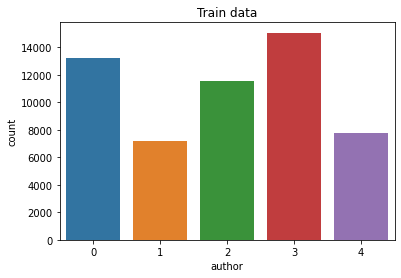

In [73]:
fig=plt.figure()

sns.countplot(train['author'])
plt.title('Train data')

plt.show()

In [76]:
author0=train[train['author']==0]
author0_text_length=[len(i) for i in author0['text']]

author1=train[train['author']==1]
author1_text_length=[len(i) for i in author1['text']]

author2=train[train['author']==2]
author2_text_length=[len(i) for i in author2['text']]

author3=train[train['author']==3]
author3_text_length=[len(i) for i in author3['text']]

author4=train[train['author']==4]
author4_text_length=[len(i) for i in author4['text']]

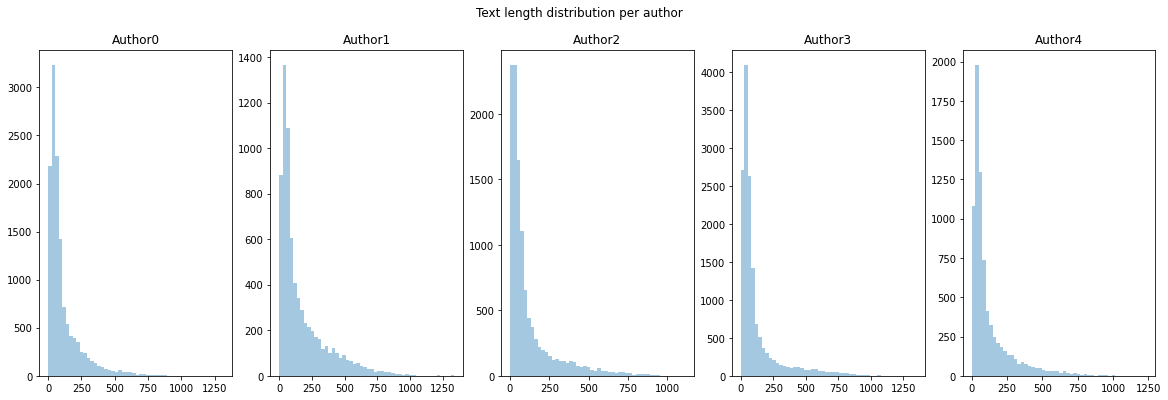

In [93]:
fig=plt.figure(figsize=(20,6))

plt.suptitle('Text length distribution per author')

ax1=fig.add_subplot(1,5,1)
sns.distplot(author0_text_length, kde=False, ax=ax1)
ax1.set_title('Author0')

ax2=fig.add_subplot(1,5,2)
sns.distplot(author1_text_length, kde=False, ax=ax2)
ax2.set_title('Author1')

ax3=fig.add_subplot(1,5,3)
sns.distplot(author2_text_length, kde=False, ax=ax3)
ax3.set_title('Author2')

ax4=fig.add_subplot(1,5,4)
sns.distplot(author3_text_length, kde=False, ax=ax4)
ax4.set_title('Author3')

ax5=fig.add_subplot(1,5,5)
sns.distplot(author4_text_length, kde=False, ax=ax5)
ax5.set_title('Author4')

plt.show()

In [107]:
text0=" ".join([i for i in author0['text']])
text1=" ".join([i for i in author1['text']])
text2=" ".join([i for i in author2['text']])
text3=" ".join([i for i in author3['text']])
text4=" ".join([i for i in author4['text']])

full_text=text0 + " " + text1 + " " + text2 + " " + text3 + " " + text4

unique_vocab_size=len(set(full_text.split()))
print("unique 단어 개수: ", unique_vocab_size)

unique 단어 개수:  47116


# **모델링**

In [15]:
# logloss 함수
def multiclass_logloss(actual, predicted, eps=1e-15):

    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

# vec=CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3),
#                     stop_words='english')

# vec.fit(list(train['text'])+list(test['text']))

# xtrain_ctv=vec.transform(train['text'])
# xtest_ctv=vec.transform(test['text'])

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
np.random.seed(2020)

In [52]:
scorer=make_scorer(multiclass_logloss, greater_is_better=False, needs_proba=True)

In [18]:
print("train['text'] max 길이: ",max(len(i) for i in train['text']))
print("test['text'] max 길이: ",max(len(i) for i in test['text']))

print("train['text'] min 길이: ",min(len(i) for i in train['text']))
print("test['text'] min 길이: ",min(len(i) for i in test['text']))

train['text'] max 길이:  1345
test['text'] max 길이:  1394
train['text'] min 길이:  0
test['text'] min 길이:  40


In [53]:
# TF-IDF 모델 생성
tfv=TfidfVectorizer(min_df=3, smooth_idf=1, sublinear_tf=1, use_idf=1)
tfv.fit(list(train['text'])+list(test['text']))
xtrain_tfv=tfv.transform(train['text'])
xtest_tfv=tfv.transform(test['text'])

In [54]:
y=train['author']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(xtrain_tfv, y, 
                                                    test_size=0.3, random_state=2020)

In [56]:
model=MultinomialNB()
model.fit(xtrain_tfv, y)
predictions=model.predict_proba(X_test)

print('TF-IDF, logloss: %0.3f' % multiclass_logloss(y_test, predictions))

TF-IDF, logloss: 0.785


In [62]:
nb_model = MultinomialNB()

# Create the pipeline 
clf = Pipeline([('nb', nb_model)])

# parameter grid
param_grid = {'nb__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Grid Search Model
model = GridSearchCV(estimator=clf, param_grid=param_grid, scoring=scorer,
                                 verbose=10, n_jobs=-1, iid=True, refit=True, cv=5)

# Fit Grid Search Model
model.fit(xtrain_tfv, y)
print("Best score: %0.3f" % model.best_score_)
print("Best parameters set:")
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1945s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1918s.) Setting batch_size=4.


Best score: -0.731
Best parameters set:
	nb__alpha: 0.01


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished


In [108]:
model=MultinomialNB(alpha=0.01)
model.fit(xtrain_tfv, y)
predictions=model.predict_proba(X_test)

print('TF-IDF & gridsearch, logloss: %0.3f' % multiclass_logloss(y_test, predictions))

TF-IDF & gridsearch, logloss: 0.494


In [109]:
pred=model.predict_proba(xtest_tfv)

In [110]:
pred

array([[1.70424038e-02, 2.47061047e-01, 1.93444800e-01, 5.35892293e-01,
        6.55945631e-03],
       [5.88371713e-02, 6.79357975e-01, 3.45041324e-03, 2.56035237e-01,
        2.31920380e-03],
       [9.57169738e-01, 8.79603771e-04, 1.52072980e-03, 1.34799904e-02,
        2.69499377e-02],
       ...,
       [1.14154671e-02, 9.84924466e-01, 6.74751323e-04, 1.81180166e-03,
        1.17351413e-03],
       [5.94252521e-03, 9.87326726e-01, 2.28736527e-03, 4.36368616e-03,
        7.96977375e-05],
       [9.24101007e-01, 3.99863714e-04, 7.15261408e-03, 1.80148766e-02,
        5.03316388e-02]])

In [111]:
# submission
sample_submission[['0', '1', '2', '3', '4']] = pred
sample_submission

,index,0,1,2,3,4
0,0,0.017042,0.247061,0.193445,0.535892,0.006559
1,1,0.058837,0.679358,0.003450,0.256035,0.002319
2,2,0.957170,0.000880,0.001521,0.013480,0.026950
3,3,0.003509,0.000002,0.988979,0.002932,0.004578
4,4,0.518082,0.010275,0.061406,0.393373,0.016864
...,...,...,...,...,...,...
19612,19612,0.005555,0.992445,0.000055,0.001011,0.000934
19613,19613,0.573064,0.017515,0.182178,0.012725,0.214518
19614,19614,0.011415,0.984924,0.000675,0.001812,0.001174
19615,19615,0.005943,0.987327,0.002287,0.004364,0.000080


In [112]:
sample_submission.to_csv('/content/drive/My Drive/Semi-project_01/submission_naiveBayes03.csv', index = False, encoding = 'utf-8')